<a href="https://colab.research.google.com/github/shaikfakruddin2018/Project-Portfolio/blob/main/Machine_Learning_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
bf = pd.read_csv('customer.csv')

In [5]:
bf['date'] = pd.to_datetime(bf['date'])

In [7]:
bf['year'] = bf['date'].dt.year
bf['week'] = bf['date'].dt.isocalendar().week

In [9]:
weekly_spending = bf.groupby(['customer_id', 'year', 'week'])['amount'].sum().reset_index()


In [10]:
weekly_spending.rename(columns={'amount': 'weekly_spending'}, inplace=True)

In [11]:
print(weekly_spending.head())

      customer_id  year  week  weekly_spending
0  CUS-1005756958  2018    31           353.55
1  CUS-1005756958  2018    32          1524.10
2  CUS-1005756958  2018    33          1268.96
3  CUS-1005756958  2018    34          1894.32
4  CUS-1005756958  2018    35          1098.47


In [13]:
# Drop rows with null values in specific columns
columns_with_null = ['card_present_flag', 'merchant_id', 'bpay_biller_code']  # Specify columns to target
data_dropped_nulls = bf.dropna(subset=columns_with_null)

# Check the updated dataset
print(data_dropped_nulls.info())


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 3050 to 4358
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             2 non-null      object        
 1   card_present_flag  2 non-null      float64       
 2   bpay_biller_code   2 non-null      object        
 3   account            2 non-null      object        
 4   currency           2 non-null      object        
 5   long_lat           2 non-null      object        
 6   txn_description    2 non-null      object        
 7   merchant_id        2 non-null      object        
 8   merchant_code      0 non-null      float64       
 9   first_name         2 non-null      object        
 10  balance            2 non-null      float64       
 11  date               2 non-null      datetime64[ns]
 12  gender             2 non-null      object        
 13  age                2 non-null      int64         
 14  merchant_subu

In [14]:
cleaned_data = bf.drop_duplicates()

In [15]:
cleaned_data['gender'] = cleaned_data['gender'].str.lower()
cleaned_data['movement'] = cleaned_data['movement'].str.lower()

In [16]:
q99 = cleaned_data['amount'].quantile(0.99)
cleaned_data['amount'] = cleaned_data['amount'].clip(upper=q99)

In [17]:
columns_to_remove = ['long_lat', 'extraction', 'currency', 'transaction_id', 'country', 'account', 'status']
cleaned_data = cleaned_data.drop(columns=columns_to_remove, axis=1)

In [18]:
print(cleaned_data.head())

   card_present_flag bpay_biller_code txn_description  \
0                1.0              NaN             POS   
1                0.0              NaN       SALES-POS   
2                1.0              NaN             POS   
3                1.0              NaN       SALES-POS   
4                1.0              NaN       SALES-POS   

                            merchant_id  merchant_code first_name  balance  \
0  81c48296-73be-44a7-befa-d053f48ce7cd            NaN      Diana    35.39   
1  830a451c-316e-4a6a-bf25-e37caedca49e            NaN      Diana    21.20   
2  835c231d-8cdf-4e96-859d-e9d571760cf0            NaN    Michael     5.71   
3  48514682-c78a-4a88-b0da-2d6302e64673            NaN     Rhonda  2117.22   
4  b4e02c10-0852-4273-b8fd-7b3395e32eb0            NaN      Diana    17.95   

        date gender  age merchant_suburb merchant_state  amount  \
0 2018-08-01      f   26         Ashmore            QLD   16.25   
1 2018-08-01      f   26          Sydney            NS

In [19]:
# Specify the columns where null values should be dropped
columns_to_check = ['card_present_flag', 'bpay_biller_code', 'merchant_id']

# Drop rows where any of these columns have null values
data_cleaned = bf.dropna(subset=columns_to_check)

# Display the cleaned dataset
print(data_cleaned.info())
print(data_cleaned.head())

# Save the cleaned dataset if needed
# data_cleaned.to_csv('cleaned_data.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 3050 to 4358
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             2 non-null      object        
 1   card_present_flag  2 non-null      float64       
 2   bpay_biller_code   2 non-null      object        
 3   account            2 non-null      object        
 4   currency           2 non-null      object        
 5   long_lat           2 non-null      object        
 6   txn_description    2 non-null      object        
 7   merchant_id        2 non-null      object        
 8   merchant_code      0 non-null      float64       
 9   first_name         2 non-null      object        
 10  balance            2 non-null      float64       
 11  date               2 non-null      datetime64[ns]
 12  gender             2 non-null      object        
 13  age                2 non-null      int64         
 14  merchant_subu

In [21]:
cleaned_data = bf.drop(columns=['bpay_biller_code', 'merchant_code', 'merchant_suburb', 'merchant_state'])


In [23]:
# Check for remaining null values
print(cleaned_data.isnull().sum())


status                  0
card_present_flag    4326
account                 0
currency                0
long_lat                0
txn_description         0
merchant_id          4326
first_name              0
balance                 0
date                    0
gender                  0
age                     0
extraction              0
amount                  0
transaction_id          0
country                 0
customer_id             0
merchant_long_lat    4326
movement                0
year                    0
week                    0
dtype: int64


In [24]:
cleaned_data['card_present_flag'].fillna(cleaned_data['card_present_flag'].mode()[0], inplace=True)


<ipython-input-24-7ded48129636>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data['card_present_flag'].fillna(cleaned_data['card_present_flag'].mode()[0], inplace=True)


In [25]:
cleaned_data['merchant_id'].fillna('unknown', inplace=True)
# OR
cleaned_data.drop(columns=['merchant_id'], inplace=True)


<ipython-input-25-415f46781a91>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data['merchant_id'].fillna('unknown', inplace=True)


In [26]:
cleaned_data.drop(columns=['merchant_long_lat'], inplace=True)


In [27]:
print(cleaned_data.isnull().sum())


status               0
card_present_flag    0
account              0
currency             0
long_lat             0
txn_description      0
first_name           0
balance              0
date                 0
gender               0
age                  0
extraction           0
amount               0
transaction_id       0
country              0
customer_id          0
movement             0
year                 0
week                 0
dtype: int64


In [28]:
# Step 1: Aggregate weekly spending per customer
weekly_spending = cleaned_data.groupby(['customer_id', 'year', 'week'])['amount'].sum().reset_index()
weekly_spending.rename(columns={'amount': 'weekly_spending'}, inplace=True)

In [29]:
# Average weekly spending per customer
avg_spending = weekly_spending.groupby('customer_id')['weekly_spending'].mean().reset_index()
avg_spending.rename(columns={'weekly_spending': 'avg_weekly_spending'}, inplace=True)

In [30]:
# Merge the average spending back to the weekly data
weekly_spending = weekly_spending.merge(avg_spending, on='customer_id', how='left')

In [31]:
# Calculate spending trend (current week vs. previous week)
weekly_spending['spending_trend'] = weekly_spending.groupby('customer_id')['weekly_spending'].diff()

In [32]:
# Step 3: Transaction count per week (if available in the raw data)
transaction_count = cleaned_data.groupby(['customer_id', 'year', 'week']).size().reset_index(name='transaction_count')

In [33]:
# Merge transaction count into the weekly data
weekly_spending = weekly_spending.merge(transaction_count, on=['customer_id', 'year', 'week'], how='left')

In [34]:
# Step 4: Normalize the features (if needed for modeling)
from sklearn.preprocessing import MinMaxScaler


In [35]:
scaler = MinMaxScaler()
weekly_spending[['weekly_spending', 'avg_weekly_spending', 'spending_trend']] = scaler.fit_transform(
    weekly_spending[['weekly_spending', 'avg_weekly_spending', 'spending_trend']]
)


In [37]:
# Display the first few rows of the engineered features
print(weekly_spending.head())

# Save the engineered dataset to a CSV file if needed
weekly_spending.to_csv('feature_engineered_weekly_spending.csv', index=False)


      customer_id  year  week  weekly_spending  avg_weekly_spending  \
0  CUS-1005756958  2018    31         0.019533             0.163161   
1  CUS-1005756958  2018    32         0.085324             0.163161   
2  CUS-1005756958  2018    33         0.070984             0.163161   
3  CUS-1005756958  2018    34         0.106132             0.163161   
4  CUS-1005756958  2018    35         0.061401             0.163161   

   spending_trend  transaction_count  
0             NaN                 10  
1        0.533592                 12  
2        0.492715                  9  
3        0.517960                 17  
4        0.477212                  2  


<ipython-input-38-ea484beae0dc>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=weekly_spending, x='week', y='weekly_spending', estimator='mean', ci=None)


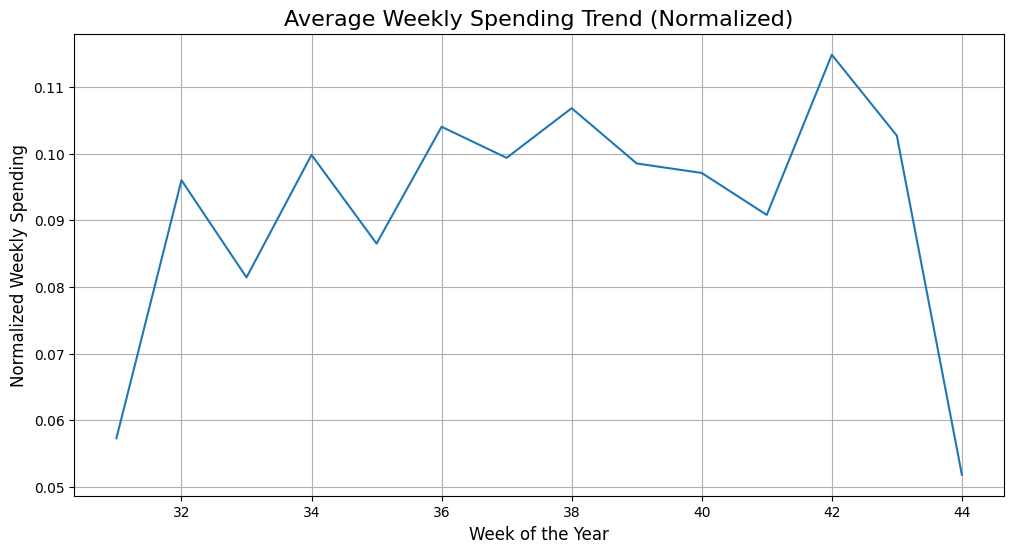

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Weekly spending trend for all customers
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_spending, x='week', y='weekly_spending', estimator='mean', ci=None)
plt.title('Average Weekly Spending Trend (Normalized)', fontsize=16)
plt.xlabel('Week of the Year', fontsize=12)
plt.ylabel('Normalized Weekly Spending', fontsize=12)
plt.grid(True)
plt.show()


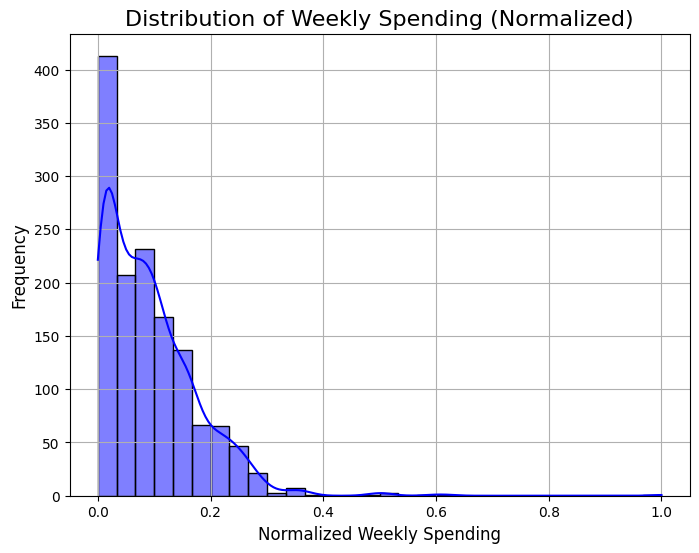

In [39]:
# Distribution of normalized weekly spending
plt.figure(figsize=(8, 6))
sns.histplot(weekly_spending['weekly_spending'], bins=30, kde=True, color='blue')
plt.title('Distribution of Weekly Spending (Normalized)', fontsize=16)
plt.xlabel('Normalized Weekly Spending', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


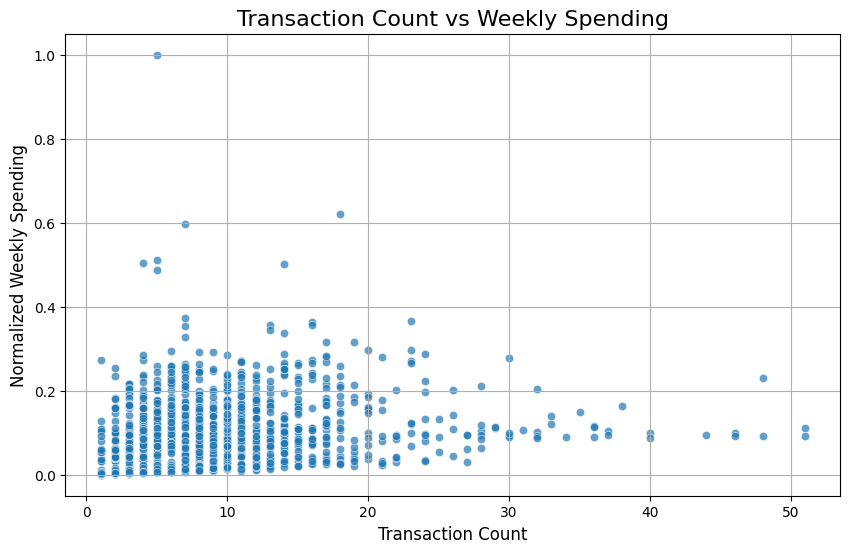

In [40]:
# Scatter plot to show relationship between transaction count and weekly spending
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weekly_spending, x='transaction_count', y='weekly_spending', alpha=0.7)
plt.title('Transaction Count vs Weekly Spending', fontsize=16)
plt.xlabel('Transaction Count', fontsize=12)
plt.ylabel('Normalized Weekly Spending', fontsize=12)
plt.grid(True)
plt.show()


<ipython-input-41-4ad052fed130>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=weekly_spending, x='spending_category', palette='coolwarm')


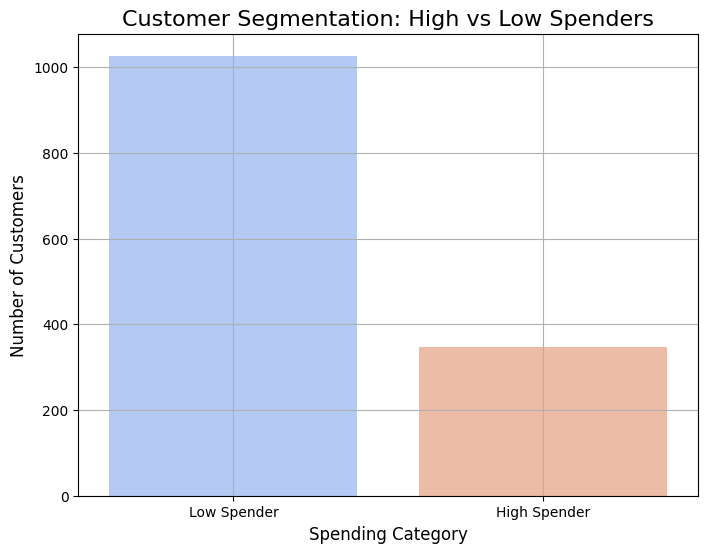

In [41]:
# Define high and low spenders based on average weekly spending
spending_threshold = 0.5  # Adjust threshold as needed
weekly_spending['spending_category'] = weekly_spending['avg_weekly_spending'].apply(
    lambda x: 'High Spender' if x > spending_threshold else 'Low Spender'
)

# Count plot of spending categories
plt.figure(figsize=(8, 6))
sns.countplot(data=weekly_spending, x='spending_category', palette='coolwarm')
plt.title('Customer Segmentation: High vs Low Spenders', fontsize=16)
plt.xlabel('Spending Category', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(True)
plt.show()


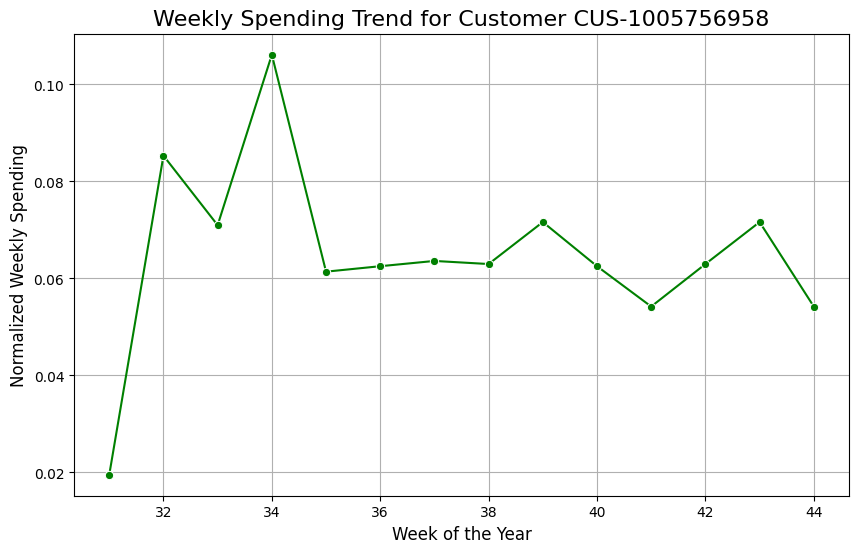

In [42]:
# Filter data for a single customer
customer_id_example = 'CUS-1005756958'  # Replace with any customer ID from the dataset
customer_data = weekly_spending[weekly_spending['customer_id'] == customer_id_example]

# Plot weekly spending trend for the customer
plt.figure(figsize=(10, 6))
sns.lineplot(data=customer_data, x='week', y='weekly_spending', marker='o', color='green')
plt.title(f'Weekly Spending Trend for Customer {customer_id_example}', fontsize=16)
plt.xlabel('Week of the Year', fontsize=12)
plt.ylabel('Normalized Weekly Spending', fontsize=12)
plt.grid(True)
plt.show()


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Prepare the dataset for modeling
features = ['avg_weekly_spending', 'spending_trend', 'transaction_count']  # Add more features if needed
target = 'weekly_spending'

X = weekly_spending[features]
y = weekly_spending[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Baseline Model
# Use the mean of the training target as the baseline prediction
baseline_prediction = np.mean(y_train)

# Evaluate the baseline model
baseline_mae = mean_absolute_error(y_test, [baseline_prediction] * len(y_test))
baseline_mse = mean_squared_error(y_test, [baseline_prediction] * len(y_test))  # MSE
baseline_rmse = np.sqrt(baseline_mse)  # Calculate RMSE manually

print(f"Baseline MAE: {baseline_mae}")
print(f"Baseline RMSE: {baseline_rmse}")



Baseline MAE: 0.05875479527104433
Baseline RMSE: 0.07093747204932412


In [45]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest
rf_predictions = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest RMSE: {rf_rmse}")


Random Forest MAE: 0.015119074805782853
Random Forest RMSE: 0.025571069778444918


In [46]:
from xgboost import XGBRegressor

# Train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate XGBoost
xgb_predictions = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))

print(f"XGBoost MAE: {xgb_mae}")
print(f"XGBoost RMSE: {xgb_rmse}")


XGBoost MAE: 0.0165002889214532
XGBoost RMSE: 0.027658237897509198


In [47]:
from sklearn.metrics import r2_score


In [48]:
# Evaluate Random Forest
rf_predictions = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest R^2: {rf_r2}")


Random Forest MAE: 0.015119074805782853
Random Forest RMSE: 0.025571069778444918
Random Forest R^2: 0.8692102380149208


In [49]:
# Evaluate XGBoost
xgb_predictions = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
xgb_r2 = r2_score(y_test, xgb_predictions)

print(f"XGBoost MAE: {xgb_mae}")
print(f"XGBoost RMSE: {xgb_rmse}")
print(f"XGBoost R^2: {xgb_r2}")


XGBoost MAE: 0.0165002889214532
XGBoost RMSE: 0.027658237897509198
XGBoost R^2: 0.8469881836996601


In [52]:
from sklearn.impute import SimpleImputer

# Impute missing values in the training and test sets
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' if needed
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)



In [54]:
import numpy as np

# Remove rows with NaN values from NumPy arrays
X_train = X_train[~np.isnan(X_train).any(axis=1)]
y_train = y_train[:len(X_train)]  # Align target values
X_test = X_test[~np.isnan(X_test).any(axis=1)]
y_test = y_test[:len(X_test)]  # Align target values


In [56]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import numpy as np

# Step 1: Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Step 2: Define the MLP model
mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

# Step 3: Train the MLP model
mlp_model.fit(X_train, y_train)

# Step 4: Make predictions
mlp_predictions = mlp_model.predict(X_test)

# Step 5: Evaluate the MLP model
mlp_mae = mean_absolute_error(y_test, mlp_predictions)
mlp_rmse = np.sqrt(mean_squared_error(y_test, mlp_predictions))
mlp_r2 = r2_score(y_test, mlp_predictions)

# Step 6: Print evaluation metrics
print(f"MLP MAE: {mlp_mae}")
print(f"MLP RMSE: {mlp_rmse}")
print(f"MLP R^2: {mlp_r2}")


MLP MAE: 0.04775691876747588
MLP RMSE: 0.0618281655699433
MLP R^2: 0.2353746764445498


In [58]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Reshape the data for LSTM
# LSTM expects data in 3D format: (samples, timesteps, features)
X_train_lstm = np.expand_dims(X_train, axis=1)  # Adding timesteps dimension
X_test_lstm = np.expand_dims(X_test, axis=1)

# Step 2: Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])))
lstm_model.add(Dense(1))  # Output layer with one neuron for regression
lstm_model.compile(optimizer='adam', loss='mse')

# Step 3: Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, verbose=1)

# Step 4: Make predictions
lstm_predictions = lstm_model.predict(X_test_lstm)

# Step 5: Evaluate the model
lstm_mae = mean_absolute_error(y_test, lstm_predictions)
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))
lstm_r2 = r2_score(y_test, lstm_predictions)

# Step 6: Print evaluation metrics
print(f"LSTM MAE: {lstm_mae}")
print(f"LSTM RMSE: {lstm_rmse}")
print(f"LSTM R^2: {lstm_r2}")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0276
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0062
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0059
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0057
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0084
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0046
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0071
Epoch 9/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0050
Epoch 10/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0050
Epoch 11/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039
Epoch 12/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043
Epoch 13/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038
Epoch 14/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039
Epoch 15/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038
Epoch 16/20
35/35 ━━━━━━━━━━━━

In [59]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


In [60]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Define the CatBoost model
catboost_model = CatBoostRegressor(
    iterations=500,          # Number of boosting iterations
    learning_rate=0.1,       # Step size shrinkage
    depth=6,                 # Depth of trees
    random_seed=42,          # Random seed for reproducibility
    verbose=100              # Show progress during training
)

# Step 2: Train the CatBoost model
catboost_model.fit(X_train, y_train)

# Step 3: Make predictions
catboost_predictions = catboost_model.predict(X_test)

# Step 4: Evaluate the CatBoost model
catboost_mae = mean_absolute_error(y_test, catboost_predictions)
catboost_rmse = np.sqrt(mean_squared_error(y_test, catboost_predictions))
catboost_r2 = r2_score(y_test, catboost_predictions)

# Step 5: Print evaluation metrics
print(f"CatBoost MAE: {catboost_mae}")
print(f"CatBoost RMSE: {catboost_rmse}")
print(f"CatBoost R^2: {catboost_r2}")


0:	learn: 0.0817249	total: 73ms	remaining: 36.4s
100:	learn: 0.0258337	total: 551ms	remaining: 2.18s
200:	learn: 0.0204665	total: 954ms	remaining: 1.42s
300:	learn: 0.0179497	total: 1.28s	remaining: 846ms
400:	learn: 0.0160401	total: 1.8s	remaining: 444ms
499:	learn: 0.0144218	total: 2.35s	remaining: 0us
CatBoost MAE: 0.015411004813439417
CatBoost RMSE: 0.025036065884719527
CatBoost R^2: 0.87462581401262


In [61]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'iterations': [500, 1000],
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [3, 5, 7]
}

# Initialize the CatBoost regressor
catboost_model = CatBoostRegressor(random_seed=42, verbose=0)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=catboost_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use MSE for optimization
    cv=3,
    verbose=1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 3, 'learning_rate': 0.05}


In [62]:
# Train the CatBoost model with the best parameters
final_catboost_model = CatBoostRegressor(
    iterations=best_params['iterations'],
    depth=best_params['depth'],
    learning_rate=best_params['learning_rate'],
    l2_leaf_reg=best_params['l2_leaf_reg'],
    random_seed=42,
    verbose=100
)

final_catboost_model.fit(X_train, y_train)

# Evaluate the model
final_predictions = final_catboost_model.predict(X_test)
final_mae = mean_absolute_error(y_test, final_predictions)
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
final_r2 = r2_score(y_test, final_predictions)

print(f"Final CatBoost MAE: {final_mae}")
print(f"Final CatBoost RMSE: {final_rmse}")
print(f"Final CatBoost R^2: {final_r2}")


0:	learn: 0.0845668	total: 3.55ms	remaining: 3.54s
100:	learn: 0.0289855	total: 227ms	remaining: 2.02s
200:	learn: 0.0255127	total: 362ms	remaining: 1.44s
300:	learn: 0.0228000	total: 631ms	remaining: 1.46s
400:	learn: 0.0206372	total: 1s	remaining: 1.5s
500:	learn: 0.0191046	total: 1.3s	remaining: 1.29s
600:	learn: 0.0177409	total: 1.61s	remaining: 1.07s
700:	learn: 0.0168206	total: 1.88s	remaining: 802ms
800:	learn: 0.0159427	total: 2.18s	remaining: 541ms
900:	learn: 0.0150936	total: 2.42s	remaining: 266ms
999:	learn: 0.0143965	total: 2.63s	remaining: 0us
Final CatBoost MAE: 0.015546286438209152
Final CatBoost RMSE: 0.025487575405788065
Final CatBoost R^2: 0.8700629501578736


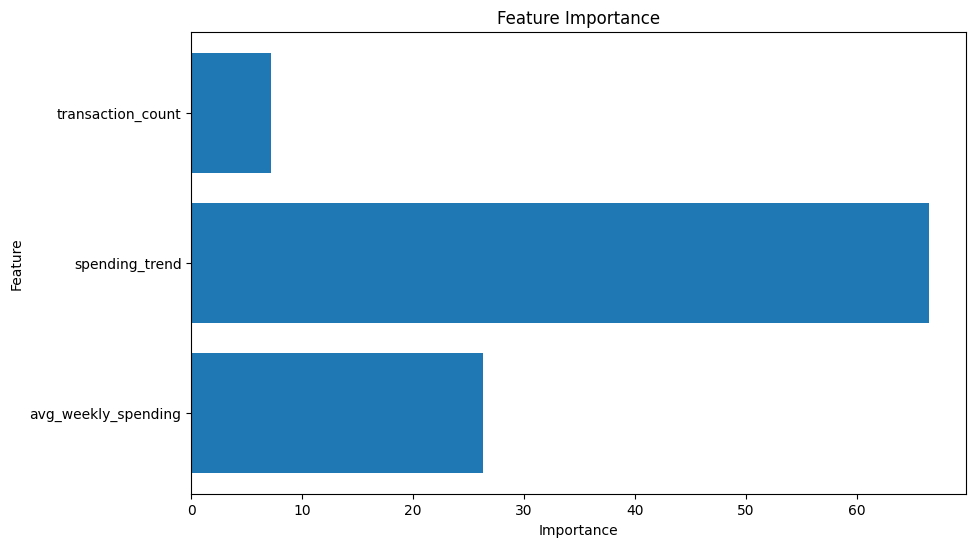

In [63]:
# Plot feature importance
import matplotlib.pyplot as plt

feature_importances = final_catboost_model.get_feature_importance()
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, tick_label=features)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


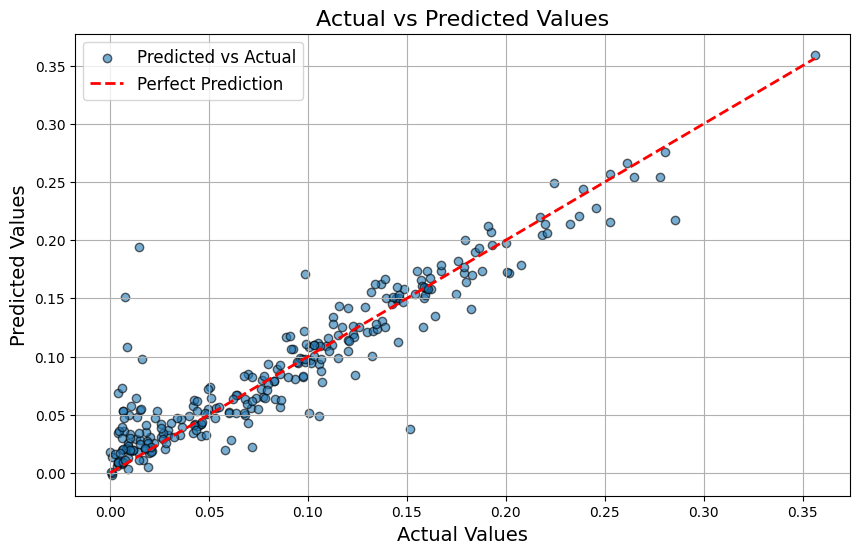

In [64]:
import matplotlib.pyplot as plt

# Ensure `y_test` and `final_predictions` are defined after evaluating the CatBoost model
# Replace `final_predictions` with the predictions from your fine-tuned CatBoost model

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, final_predictions, alpha=0.6, edgecolor='k', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction')
plt.title("Actual vs Predicted Values", fontsize=16)
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


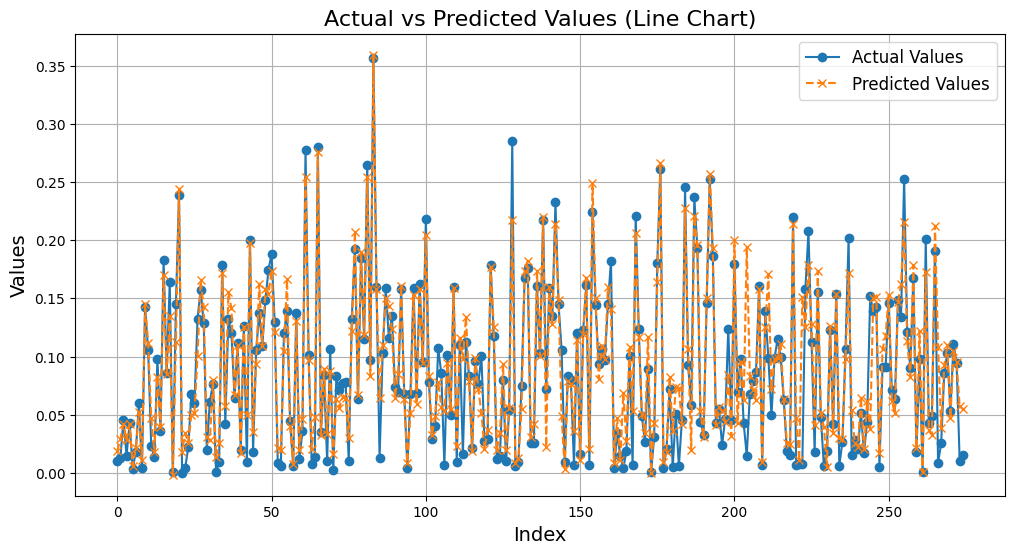

In [66]:
# Line Chart of Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Values', linestyle='-', marker='o')
plt.plot(final_predictions, label='Predicted Values', linestyle='--', marker='x')
plt.title("Actual vs Predicted Values (Line Chart)", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

